True

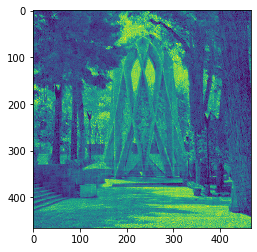

In [211]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, ifftshift


### 
# Hint: Dont forget to scale [0-1] and normalize psf
#       PSF image should be shifted before taking dft (H = fft2( ifftshif(psf) )
#       > Regards
###


img_blurred = cv2.imread('Khayyam.jpg' , 0)
img_blurred = img_blurred.astype(float)

psf = cv2.imread('psf1.bmp' , 0)
psf = psf.astype(float)
psf /= psf.max()


def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel.astype(float))
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(ifftshift(kernel))
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy


deblurred_image = wiener_filter(img_blurred, psf, .001)

plt.imshow(np.uint(deblurred_image))


cv2.imwrite('wienwr_deblurred.jpg'   , deblurred_image )

True

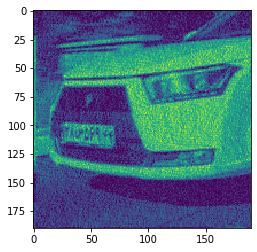

In [305]:
import math
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, ifftshift


path='C:/Users/jobe/Desktop/HW_5/car.jpg'
blurred_car=cv2.imread(path , 0)
blurred_car= blurred_car.astype(float)

psf_2 = np.zeros((190,190) , dtype='float32')
h , w = psf_2.shape[:2]

start_point = (104, 94) 
end_point = (80, 98) 
thickness = 1
color = (255)

psf_2 = cv2.line(psf_2 , start_point, end_point, color, thickness)
cv2.imwrite('psf_2.bmp' ,psf_2 )


def wiener_filter(img, kernel, K):
    kernel /= kernel.max()
    kernel /= np.sum(kernel.astype(float))
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(ifftshift(kernel))
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
                   
    return dummy

deblurred_car = wiener_filter(blurred_car, psf_2, 0.001)

plt.imshow(deblurred_car)

cv2.imwrite('deblurred_car.jpg', deblurred_car )

#cv2.imshow('deblurred_car.jpg',deblurred_car )
#cv2.waitKey(15)